Data from https://www.kaggle.com/datasets/airbnb/seattle?select=listings.csv

In [1]:
!head listings.csv

id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_re

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import json

from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('listings.csv')

In [4]:
print(len(df))

3818


In [5]:
display(df.head().T)

,0,1,2,3,4
id,241032,953595,3308979,7421966,278830
listing_url,https://www.airbnb.com/rooms/241032,https://www.airbnb.com/rooms/953595,https://www.airbnb.com/rooms/3308979,https://www.airbnb.com/rooms/7421966,https://www.airbnb.com/rooms/278830
scrape_id,20160104002432,20160104002432,20160104002432,20160104002432,20160104002432
last_scraped,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04
name,Stylish Queen Anne Apartment,Bright & Airy Queen Anne Apartment,New Modern House-Amazing water view,Queen Anne Chateau,Charming craftsman 3 bdm house
...,...,...,...,...,...
cancellation_policy,moderate,strict,strict,flexible,strict
require_guest_profile_picture,f,t,f,f,f
require_guest_phone_verification,f,t,f,f,f
calculated_host_listings_count,2,6,2,1,1


In [6]:
print(df.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object


In [7]:
print(df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
columns_filtered = ['host_since', 'host_response_time',
       'host_response_rate', 
'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count','host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
      'country_code', 'country','property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price']

In [9]:
df = df[columns_filtered]
display(df.head().T)

,0,1,2,3,4
host_since,2011-08-11,2013-02-21,2014-06-12,2013-11-06,2011-11-29
host_response_time,within a few hours,within an hour,within a few hours,NaN,within an hour
host_response_rate,96%,98%,67%,NaN,100%
host_acceptance_rate,100%,100%,100%,NaN,NaN
host_is_superhost,f,t,f,f,f
host_total_listings_count,3.0,6.0,2.0,1.0,2.0
host_identity_verified,t,t,t,t,t
neighbourhood,Queen Anne,Queen Anne,Queen Anne,Queen Anne,Queen Anne
neighbourhood_cleansed,West Queen Anne,West Queen Anne,West Queen Anne,West Queen Anne,West Queen Anne
neighbourhood_group_cleansed,Queen Anne,Queen Anne,Queen Anne,Queen Anne,Queen Anne


## Data Cleaning

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
display(df.head().T)

,0,1,2,3,4
host_since,2011-08-11,2013-02-21,2014-06-12,2013-11-06,2011-11-29
host_response_time,within_a_few_hours,within_an_hour,within_a_few_hours,NaN,within_an_hour
host_response_rate,96%,98%,67%,NaN,100%
host_acceptance_rate,100%,100%,100%,NaN,NaN
host_is_superhost,f,t,f,f,f
host_total_listings_count,3.0,6.0,2.0,1.0,2.0
host_identity_verified,t,t,t,t,t
neighbourhood,queen_anne,queen_anne,queen_anne,queen_anne,queen_anne
neighbourhood_cleansed,west_queen_anne,west_queen_anne,west_queen_anne,west_queen_anne,west_queen_anne
neighbourhood_group_cleansed,queen_anne,queen_anne,queen_anne,queen_anne,queen_anne


In [12]:
# Function to convert JSON string to list
def json_to_list(json_str):
    try:
        # Remove the curly braces and quotes, then split by comma
        # Assuming that the amenities are in a set-like structure `{amenity1,amenity2,...}`
        json_str = json_str.strip("{}")
        # Split the string by comma not within quotes
        lst = [s.strip().strip('"') for s in json_str.split(',') if s.strip()]
        return lst
    except json.JSONDecodeError:
        # In case of decoding error, return an empty list or None
        return []

In [13]:
# Apply the function to the 'amenities' column
df['amenities_list'] = df['amenities'].apply(json_to_list)

# Convert the 'price' column to a numeric type (float)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [14]:
# Convert the 'host_since' column to datetime
df['host_since'] = pd.to_datetime(df['host_since'])

# Extract the year from the datetime column
df['year'] = df['host_since'].dt.year
df['age'] = max(df['year']) - df.year

In [15]:
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace('%', ''), errors='coerce')

In [16]:
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'].str.replace('%', ''), errors='coerce')

In [17]:
# Convert all amenities to lowercase to avoid case sensitivity issues
df['amenities_list'] = df['amenities_list'].apply(lambda amenities: [amenity.lower() for amenity in amenities])

# Get the unique list of all possible amenities
all_amenities = set(amenity for sublist in df['amenities_list'] for amenity in sublist)

# Now create binary columns for each amenity
for amenity in all_amenities:
    # Create a new column for each amenity
    df[amenity] = df['amenities_list'].apply(lambda x: 1 if amenity in x else 0)

## Exploratory data analysis

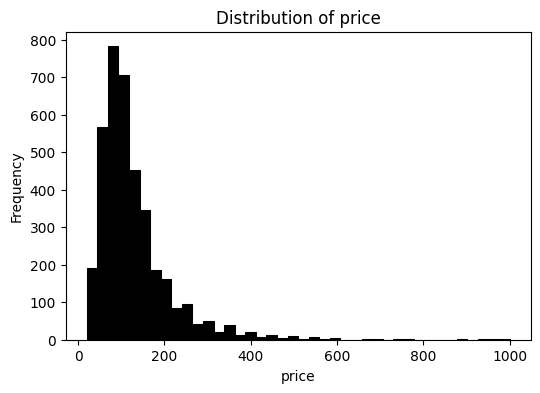

In [18]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price.values, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('price')
plt.title('Distribution of price')

plt.show()

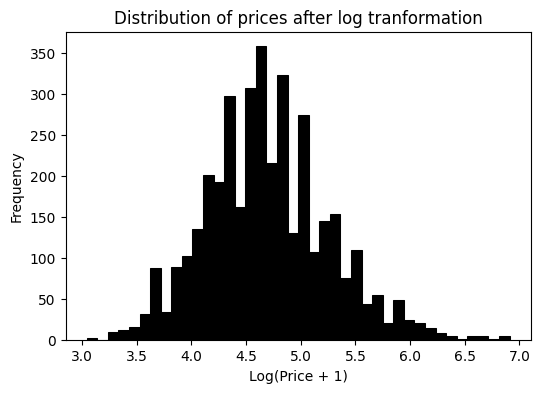

In [19]:
log_price = np.log1p(df.price)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [20]:
print(df.isnull().sum()[df.isnull().sum()>0])

host_since                     2
host_response_time           523
host_response_rate           523
host_acceptance_rate         773
host_is_superhost              2
host_total_listings_count      2
host_identity_verified         2
neighbourhood                416
zipcode                        7
property_type                  1
bathrooms                     16
bedrooms                       6
beds                           1
year                           2
age                            2
dtype: int64


In [21]:
for eachcolumn in ['host_response_time','host_response_rate','host_acceptance_rate','age','beds',
               'bedrooms','bathrooms','host_total_listings_count']:
    df[eachcolumn] = df[eachcolumn].fillna(0)

In [22]:
df['neighbourhood'] = df['neighbourhood'].fillna('unknown')
df['zipcode'] = df['zipcode'].fillna('unknown')

In [23]:
print(df.isnull().sum()[df.isnull().sum()>0])

host_since                2
host_is_superhost         2
host_identity_verified    2
property_type             1
year                      2
dtype: int64


In [24]:
df = df.dropna()

In [25]:
print(df.isnull().sum()[df.isnull().sum()>0])

Series([], dtype: int64)


In [26]:
print(df.dtypes)

host_since              datetime64[ns]
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
                             ...      
heating                          int64
suitable_for_events              int64
tv                               int64
family/kid_friendly              int64
washer                           int64
Length: 69, dtype: object


## Feature Importance

In [27]:
categorical = ['host_response_time', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'country_code', 'property_type',
       'room_type', 'bed_type','24-hour_check-in','air_conditioning','breakfast','buzzer/wireless_intercom',
       'cable_tv','carbon_monoxide_detector','cat(s)','dog(s)','doorman','dryer','elevator_in_building',
       'essentials','family/kid_friendly','fire_extinguisher','first_aid_kit','free_parking_on_premises',
       'gym','hair_dryer','hangers','heating','hot_tub','indoor_fireplace','internet','iron','kitchen',
       'laptop_friendly_workspace','lock_on_bedroom_door','other_pet(s)','pets_allowed',
       'pets_live_on_this_property','pool','safety_card','shampoo','smoke_detector','smoking_allowed',
       'suitable_for_events','tv','washer','washer_/_dryer','wheelchair_accessible','wireless_internet']
numerical = ['host_acceptance_rate','host_response_rate','age','host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds']

In [28]:

# Pre-process the categorical columns
label_encoders = {}
for column in categorical:
    le = LabelEncoder()
    # Fill NaN with a placeholder string and convert to type str to ensure all data is of the same type
    df[column] = df[column].fillna('Unknown').astype(str)
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

def calculate_mi(series):
    return round(mutual_info_score(series, df.price), 2)

# Now apply the calculate_mi function
df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(df_mi.head(10))
display(df_mi.tail())


,MI
neighbourhood_cleansed,1.11
neighbourhood,0.98
zipcode,0.63
neighbourhood_group_cleansed,0.46
room_type,0.33
property_type,0.23
host_response_time,0.15
family/kid_friendly,0.10
cable_tv,0.09
tv,0.08


,MI
city,0.01
country_code,0.00
market,0.00
state,0.00
washer_/_dryer,0.00


In [29]:
df[numerical].corrwith(df.price).to_frame('correlation')

,correlation
host_acceptance_rate,-0.130209
host_response_rate,-0.092034
age,0.050986
host_total_listings_count,0.093960
accommodates,0.652665
bathrooms,0.512405
bedrooms,0.627307
beds,0.588853


In [30]:
display(df[numerical].corr())

,host_acceptance_rate,host_response_rate,age,host_total_listings_count,accommodates,bathrooms,bedrooms,beds
host_acceptance_rate,1.000000,0.723042,0.093903,0.105414,0.035016,-0.019316,-0.054496,0.019242
host_response_rate,0.723042,1.000000,0.077087,0.086441,0.046364,-0.000222,-0.026129,0.035823
age,0.093903,0.077087,1.000000,0.046268,0.094272,0.037930,0.069463,0.072739
host_total_listings_count,0.105414,0.086441,0.046268,1.000000,0.111221,0.066783,0.062572,0.085543
accommodates,0.035016,0.046364,0.094272,0.111221,1.000000,0.533581,0.769686,0.860681
bathrooms,-0.019316,-0.000222,0.037930,0.066783,0.533581,1.000000,0.606148,0.528845
bedrooms,-0.054496,-0.026129,0.069463,0.062572,0.769686,0.606148,1.000000,0.752739
beds,0.019242,0.035823,0.072739,0.085543,0.860681,0.528845,0.752739,1.000000


### Linear Regression

In [31]:
df['price_log'] = np.log1p(df['price'])
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)
y_train = df_train.price_log.values
y_val = df_val.price_log.values
y_test = df_test.price_log.values

del df_train['price_log']
del df_val['price_log']
del df_test['price_log']

del df_train['price']
del df_val['price']
del df_test['price']



In [32]:
# List of alpha values to try
alphas = [0, 0.01, 0.1, 1, 10]
# Dictionary to store RMSE scores for each alpha
rmse_scores = {}

for alpha in alphas:
    # Create and fit the Ridge regression model
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    model.fit(X_train, y_train)
    
    
    test_dict = df_test[categorical + numerical].to_dict(orient='records')
    X_test = dv.transform(test_dict)
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE and round it to 3 decimal places
    rmse = round(np.sqrt(((y_pred - y_test) ** 2).mean()), 10)
    
    # Store RMSE in the dictionary
    rmse_scores[alpha] = rmse

# Display the RMSE scores for different alpha values
for alpha, rmse in rmse_scores.items():
    print(f"Alpha={alpha}: RMSE={rmse}")

Alpha=0: RMSE=0.328795451
Alpha=0.01: RMSE=0.3287956813
Alpha=0.1: RMSE=0.3287977551
Alpha=1: RMSE=0.3288185546
Alpha=10: RMSE=0.3290325786


## Decision Tree

In [33]:
dict_train = df_train[categorical + numerical].to_dict(orient='records')
dict_val = df_val[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [34]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
y_pred = dt.predict(X_train)
print("On Training :" , np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = dt.predict(X_val)
print("On Testing :",np.sqrt(mean_squared_error(y_val, y_pred)))

On Training : 0.021372026534220802
On Testing : 0.4252357789423333


In [36]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_train)
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
print('On Training RMSE: %.3f' % RMSE)

y_pred = dt.predict(X_val)
RMSE = np.sqrt(mean_squared_error(y_val, y_pred))
print('On Testing RMSE: %.3f' % RMSE)

On Training RMSE: 0.453
On Testing RMSE: 0.428


## Random forest

In [37]:
rf = RandomForestRegressor(n_estimators=10, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print(np.sqrt(mean_squared_error(y_val, y_pred)))

0.318447165665049


In [38]:
RMSES = []

for i in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=i, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    RMSE = np.sqrt(mean_squared_error(y_val, y_pred))
    print('%s -> %.3f' % (i, RMSE))
    RMSES.append(RMSE)

10 -> 0.318
20 -> 0.305
30 -> 0.301
40 -> 0.299
50 -> 0.300
60 -> 0.298
70 -> 0.296
80 -> 0.295
90 -> 0.295
100 -> 0.294
110 -> 0.293
120 -> 0.293
130 -> 0.293
140 -> 0.293
150 -> 0.293
160 -> 0.293
170 -> 0.293
180 -> 0.293
190 -> 0.293
200 -> 0.292


Tuinnig the `max_depth` parameter:

In [39]:
all_RMSES = {}

for depth in [40, 80, 100]:
    print('depth: %s' % depth)
    RMSES = []

    for i in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=i, max_depth=depth, random_state=1,n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        RMSE =  np.sqrt(mean_squared_error(y_val, y_pred))
        print('%s -> %.3f' % (i, RMSE))
        RMSES.append(RMSE)
    
    all_RMSES[depth] = RMSES
    print()
    

depth: 40
10 -> 0.318
20 -> 0.305
30 -> 0.301
40 -> 0.299
50 -> 0.300
60 -> 0.298
70 -> 0.296
80 -> 0.295
90 -> 0.295
100 -> 0.294
110 -> 0.293
120 -> 0.293
130 -> 0.293
140 -> 0.293
150 -> 0.293
160 -> 0.293
170 -> 0.293
180 -> 0.293
190 -> 0.293
200 -> 0.292

depth: 80
10 -> 0.318
20 -> 0.305
30 -> 0.301
40 -> 0.299
50 -> 0.300
60 -> 0.298
70 -> 0.296
80 -> 0.295
90 -> 0.295
100 -> 0.294
110 -> 0.293
120 -> 0.293
130 -> 0.293
140 -> 0.293
150 -> 0.293
160 -> 0.293
170 -> 0.293
180 -> 0.293
190 -> 0.293
200 -> 0.292

depth: 100
10 -> 0.318
20 -> 0.305
30 -> 0.301
40 -> 0.299
50 -> 0.300
60 -> 0.298
70 -> 0.296
80 -> 0.295
90 -> 0.295
100 -> 0.294
110 -> 0.293
120 -> 0.293
130 -> 0.293
140 -> 0.293
150 -> 0.293
160 -> 0.293
170 -> 0.293
180 -> 0.293
190 -> 0.293
200 -> 0.292



In [40]:
rf = RandomForestRegressor(n_estimators=80 , max_depth=40, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, n_estimators=80, n_jobs=-1, random_state=1)

In [41]:
y_pred_rf = rf.predict(X_val)
RMSE =  np.sqrt(mean_squared_error(y_val, y_pred))
print('%.3f' % (RMSE))

0.292


[3.02787906e-03 5.34963410e-02 1.86448572e-02 4.57098835e-03
 9.84490217e-02 3.48172456e-03 2.06397233e-01 1.08521761e-02
 2.83685575e-03 2.96415428e-03 1.47507645e-02 5.47731016e-03
 3.45582781e-03 2.68225433e-05 0.00000000e+00 3.10657894e-03
 2.12515833e-03 2.50613444e-03 1.09330769e-02 2.78848608e-03
 4.58604570e-03 3.79134943e-03 4.18433353e-03 4.79549845e-03
 3.61902534e-03 3.06951755e-03 4.00314302e-03 2.45015078e-03
 1.23589512e-02 3.75025748e-03 5.64631680e-03 1.91646234e-02
 9.57054983e-03 2.50612587e-02 3.61230486e-03 4.40782752e-03
 5.12725602e-03 2.33132055e-03 5.24854582e-03 3.06335451e-03
 7.72576291e-04 0.00000000e+00 2.29789924e-02 2.94231393e-02
 2.45486696e-02 2.47088717e-04 4.01484899e-03 3.79361121e-03
 1.83978094e-03 1.02660621e-02 2.61933577e-01 3.73967503e-03
 4.13979870e-03 3.27700711e-03 8.44337404e-04 0.00000000e+00
 4.20733666e-03 4.16923427e-03 3.06056884e-03 7.57691596e-06
 1.74376485e-03 2.27422220e-03 3.29851107e-02]
           feature      gain
50       

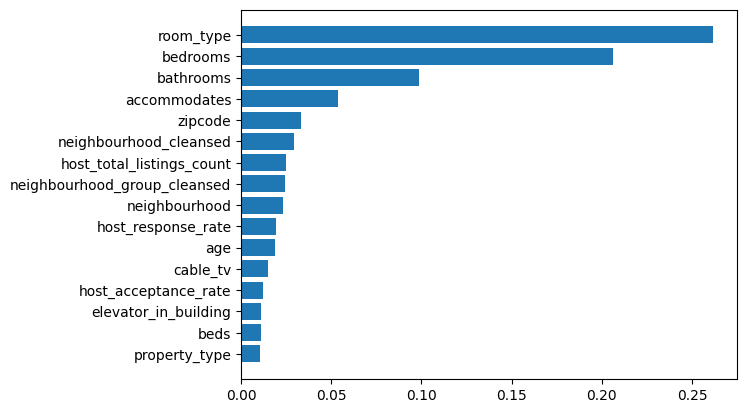

In [42]:
print(rf.feature_importances_)
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
print(df_importance)
df_importance = df_importance[df_importance.gain > 0.01]
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

## XGBoost

In [43]:
cleaned_feature_names = dv.feature_names_

In [44]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=cleaned_feature_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=cleaned_feature_names)

In [45]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = model.predict(dval)
print(np.sqrt(mean_squared_error(y_val, y_pred)))

0.30323977311576794


In [46]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'rmse',

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-rmse:0.45701	val-rmse:0.44434
[10]	train-rmse:0.23490	val-rmse:0.29967
[20]	train-rmse:0.19185	val-rmse:0.29552
[30]	train-rmse:0.16837	val-rmse:0.29647
[40]	train-rmse:0.14869	val-rmse:0.29925
[50]	train-rmse:0.12892	val-rmse:0.30062
[60]	train-rmse:0.11824	val-rmse:0.30092
[70]	train-rmse:0.10554	val-rmse:0.30146
[80]	train-rmse:0.09343	val-rmse:0.30154
[90]	train-rmse:0.08402	val-rmse:0.30289
[99]	train-rmse:0.07887	val-rmse:0.30324
